# Motor Efficiency Derivatives

In order to calculate the effect of weight on the number of achievable laps, I have extracted a simplified analytical model from our Physics repository and taken a partial derivative of optimal average speed with respect to vehicle mass.

In this formula, there are terms for motor efficiency which are velocity-dependent, so we must determine the value and slope of these functions in order to evaluate the partial derivative at a given velocity.

## Import Dependencies

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from physics.models.motor import BasicMotor

In [81]:
tire_radius_m = 0.2032 # from Simulation Brightside config

speeds_kmh = np.linspace(0, 100, 1000)
speeds_ms = speeds_kmh / 3.6
powers_w = np.linspace(0, 4000, 1000)
angular_speeds = speeds_ms / tire_radius_m
angular_speeds_mesh, powers_mesh = np.meshgrid(angular_speeds, powers_w)

# plt.imshow(speeds); plt.show()
# plt.imshow(powers); plt.show()

In [82]:
with np.errstate(invalid='ignore'):
    mc_efficiencies = BasicMotor.calculate_motor_controller_efficiency(
        angular_speeds_mesh, powers_mesh, 1 # One second; convert J to W
    )

C:\Users\Jonah\Documents\UBCSolar\2025\data_analysis\venv\Lib\site-packages\physics\models\motor\basic_motor.py:167: RuntimeWarning: overflow encountered in square
  - (1.909e-4 * motor_torque_array ** 2) + (1.602e-6 * motor_angular_speed ** 3) \
C:\Users\Jonah\Documents\UBCSolar\2025\data_analysis\venv\Lib\site-packages\physics\models\motor\basic_motor.py:169: RuntimeWarning: overflow encountered in square
  - (2.306e-7 * motor_angular_speed * motor_torque_array ** 2) \
C:\Users\Jonah\Documents\UBCSolar\2025\data_analysis\venv\Lib\site-packages\physics\models\motor\basic_motor.py:169: RuntimeWarning: invalid value encountered in multiply
  - (2.306e-7 * motor_angular_speed * motor_torque_array ** 2) \
C:\Users\Jonah\Documents\UBCSolar\2025\data_analysis\venv\Lib\site-packages\physics\models\motor\basic_motor.py:170: RuntimeWarning: overflow encountered in power
  + (2.122e-06 * motor_torque_array ** 3) - (5.701e-09 * motor_angular_speed ** 4) \
C:\Users\Jonah\Documents\UBCSolar\2025\d

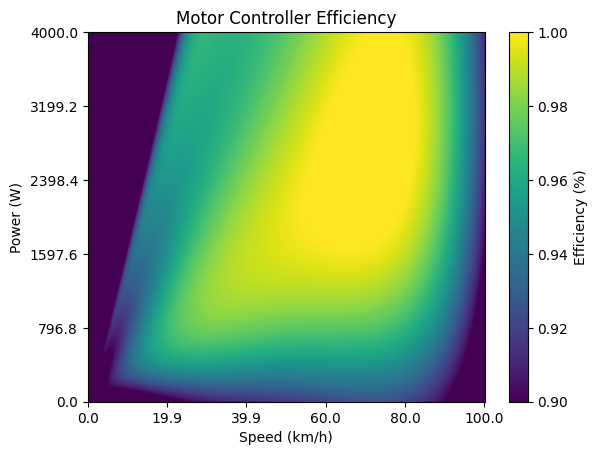

In [83]:
plt.imshow(mc_efficiencies, aspect='auto', origin='lower')

num_ticks = 6
x_tick_indices = np.linspace(0, len(speeds_kmh) - 1, num_ticks, dtype=int)
y_tick_indices = np.linspace(0, len(powers_w) - 1, num_ticks, dtype=int)

plt.xticks(x_tick_indices, np.round(speeds_kmh[x_tick_indices], 1))
plt.yticks(y_tick_indices, np.round(powers_w[y_tick_indices], 1))

plt.xlabel("Speed (km/h)")
plt.ylabel("Power (W)")
plt.title("Motor Controller Efficiency")
plt.colorbar(label="Efficiency ")
plt.show()

In [84]:
with np.errstate(invalid='ignore'):
    motor_efficiencies = BasicMotor.calculate_motor_efficiency(
        angular_speeds_mesh, powers_mesh, 1 # One second; convert J to W
    )

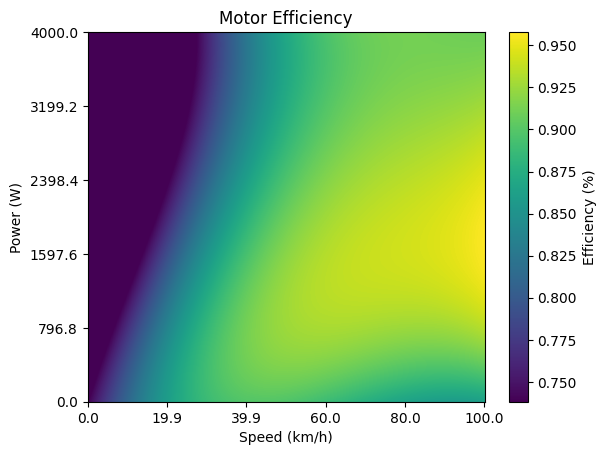

In [85]:
plt.imshow(motor_efficiencies, aspect='auto', origin='lower')

num_ticks = 6
x_tick_indices = np.linspace(0, len(speeds_kmh) - 1, num_ticks, dtype=int)
y_tick_indices = np.linspace(0, len(powers_w) - 1, num_ticks, dtype=int)

plt.xticks(x_tick_indices, np.round(speeds_kmh[x_tick_indices], 1))
plt.yticks(y_tick_indices, np.round(powers_w[y_tick_indices], 1))

plt.xlabel("Speed (km/h)")
plt.ylabel("Power (W)")
plt.title("Motor Efficiency")
plt.colorbar(label="Efficiency (%)")
plt.show()

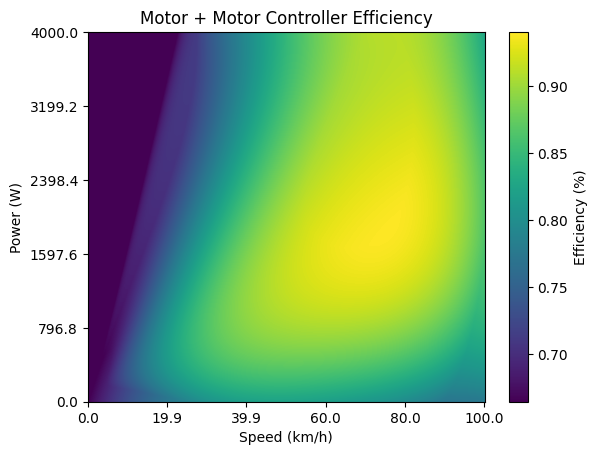

In [86]:
plt.imshow(motor_efficiencies * mc_efficiencies, aspect='auto', origin='lower')

num_ticks = 6
x_tick_indices = np.linspace(0, len(speeds_kmh) - 1, num_ticks, dtype=int)
y_tick_indices = np.linspace(0, len(powers_w) - 1, num_ticks, dtype=int)

plt.xticks(x_tick_indices, np.round(speeds_kmh[x_tick_indices], 1))
plt.yticks(y_tick_indices, np.round(powers_w[y_tick_indices], 1))

plt.xlabel("Speed (km/h)")
plt.ylabel("Power (W)")
plt.title("Motor + Motor Controller Efficiency")
plt.colorbar(label="Efficiency (%)")
plt.show()

In [ ]:
plt.subplots()